# Loading and Preprocessing 

In [ ]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer,StandardScaler
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.model_selection import train_test_split
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

In [111]:

# Load the dataset
df = pd.read_csv('road_traffic_injuries.csv', encoding='ISO-8859-1')
df


,ind_id,ind_definition,reportyear,geotype,geotypevalue,geoname,county_name,county_fips,region_name,region_code,...,avmttotal,avmtrate,LL95CI_avmtrate,UL95CI_avmtrate,avmtrate_se,avmtrate_rse,CA_decile_avmt,CA_RR_avmtrate,groupquarters,version
0,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,17/12/2013 13:55
1,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,17/12/2013 13:55
2,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,17/12/2013 13:55
3,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,17/12/2013 13:55
4,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,17/12/2013 13:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448945,753,Annual number of fatal and severe road traffic...,2010,PL,80588.0,Truckee town,Nevada,6057.0,Northeast Sierra,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,17/12/2013 13:55
448946,753,Annual number of fatal and severe road traffic...,2010,PL,80588.0,Truckee town,Nevada,6057.0,Northeast Sierra,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,17/12/2013 13:55
448947,753,Annual number of fatal and severe road traffic...,2010,PL,80588.0,Truckee town,Nevada,6057.0,Northeast Sierra,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,17/12/2013 13:55
448948,753,Annual number of fatal and severe road traffic...,2010,PL,80588.0,Truckee town,Nevada,6057.0,Northeast Sierra,6.0,...,35237538.0,28.38,0.0,84.0,28.38,100.0,NaN,1.17,43.0,17/12/2013 13:55


In [23]:
# Display basic information about the dataset
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448950 entries, 0 to 448949
Data columns (total 31 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ind_id           448950 non-null  object 
 1   ind_definition   448948 non-null  object 
 2   reportyear       448948 non-null  object 
 3   geotype          448948 non-null  object 
 4   geotypevalue     448948 non-null  float64
 5   geoname          448948 non-null  object 
 6   county_name      445371 non-null  object 
 7   county_fips      445371 non-null  float64
 8   region_name      94066 non-null   object 
 9   region_code      94066 non-null   float64
 10  mode             448948 non-null  object 
 11  severity         448948 non-null  object 
 12  injuries         447566 non-null  float64
 13  totalpop         333552 non-null  float64
 14  poprate          332644 non-null  float64
 15  LL95CI_poprate   331704 non-null  float64
 16  UL95CI_poprate   331599 

In [27]:
# Display the first few rows
df.head()

,ind_id,ind_definition,reportyear,geotype,geotypevalue,geoname,county_name,county_fips,region_name,region_code,...,avmttotal,avmtrate,LL95CI_avmtrate,UL95CI_avmtrate,avmtrate_se,avmtrate_rse,CA_decile_avmt,CA_RR_avmtrate,groupquarters,version
0,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,17/12/2013 13:55
1,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,17/12/2013 13:55
2,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,17/12/2013 13:55
3,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,17/12/2013 13:55
4,753,Annual number of fatal and severe road traffic...,2002,CO,6059.0,Orange,Orange,6059.0,Southern California,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42364.0,17/12/2013 13:55


In [31]:
df.describe()

,geotypevalue,county_fips,region_code,injuries,totalpop,poprate,LL95CI_poprate,UL95CI_poprate,poprate_se,poprate_rse,...,CA_RR_poprate,avmttotal,avmtrate,LL95CI_avmtrate,UL95CI_avmtrate,avmtrate_se,avmtrate_rse,CA_decile_avmt,CA_RR_avmtrate,groupquarters
count,4.489480e+05,445371.000000,94066.000000,447566.00000,3.335520e+05,3.326440e+05,331704.000000,331599.000000,324654.000000,311543.000000,...,275365.000000,2.180800e+04,21266.000000,21266.000000,21266.000000,21266.000000,21266.000000,859.000000,21266.000000,121521.000000
mean,4.816763e+09,6055.795018,8.762082,6.79757,6.080408e+05,9.620222e+03,9.200426,38.037243,9.320580,58.465875,...,2.635943,4.454637e+09,49.040880,21.148655,85.329755,18.514661,35.522490,5.500582,2.093846,13286.392360
std,3.169910e+09,27.275320,4.892614,122.88827,9.413326e+05,1.269840e+05,29.117388,390.004628,135.573836,59.311216,...,23.344528,1.816027e+10,99.317081,43.827419,220.595641,67.470516,35.082377,2.869084,4.103498,37797.862339
min,1.000000e+00,6001.000000,1.000000,0.20000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.010000,0.010000,...,0.030000,0.000000e+00,0.670000,0.000000,1.610000,0.140000,0.860000,1.000000,0.090000,0.000000
25%,6.011000e+09,6037.000000,4.000000,0.67000,4.459333e+04,1.810000e+00,0.000000,3.360000,0.600000,15.250000,...,0.690000,1.407871e+08,14.460000,1.412500,22.980000,2.440000,10.620000,3.000000,0.980000,458.000000
50%,6.037573e+09,6059.000000,10.000000,1.00000,2.558250e+05,6.580000e+00,1.100000,12.540000,1.760000,35.360000,...,1.110000,5.705526e+08,30.505000,10.740000,44.760000,6.480000,22.360000,6.000000,1.400000,3142.000000
75%,6.071009e+09,6073.000000,14.000000,2.00000,7.051140e+05,2.336000e+01,10.130000,36.400000,6.770000,86.600000,...,1.860000,3.624192e+09,50.637500,29.640000,75.540000,15.080000,50.000000,8.000000,2.060000,15533.000000
max,1.000000e+11,6115.000000,14.000000,13578.00000,1.805153e+07,3.048563e+06,4368.360000,84784.350000,29992.020000,254.030000,...,5182.950000,3.360000e+11,4949.820000,770.840000,11809.920000,3500.050000,223.610000,10.000000,246.050000,834673.000000


In [33]:
df.shape

(448950, 31)

In [35]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
ind_id                  0
ind_definition          2
reportyear              2
geotype                 2
geotypevalue            2
geoname                 2
county_name          3579
county_fips          3579
region_name        354884
region_code        354884
mode                    2
severity                2
injuries             1384
totalpop           115398
poprate            116306
LL95CI_poprate     117246
UL95CI_poprate     117351
poprate_se         124296
poprate_rse        137407
CA_decile_pop      438344
CA_RR_poprate      173585
avmttotal          427142
avmtrate           427684
LL95CI_avmtrate    427684
UL95CI_avmtrate    427684
avmtrate_se        427684
avmtrate_rse       427684
CA_decile_avmt     448091
CA_RR_avmtrate     427684
groupquarters      327429
version                 2
dtype: int64


In [37]:
# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display the missing values percentage
print(missing_percentage)

ind_id              0.000000
ind_definition      0.000445
reportyear          0.000445
geotype             0.000445
geotypevalue        0.000445
geoname             0.000445
county_name         0.797193
county_fips         0.797193
region_name        79.047555
region_code        79.047555
mode                0.000445
severity            0.000445
injuries            0.308275
totalpop           25.703976
poprate            25.906226
LL95CI_poprate     26.115603
UL95CI_poprate     26.138991
poprate_se         27.685934
poprate_rse        30.606304
CA_decile_pop      97.637599
CA_RR_poprate      38.664662
avmttotal          95.142443
avmtrate           95.263170
LL95CI_avmtrate    95.263170
UL95CI_avmtrate    95.263170
avmtrate_se        95.263170
avmtrate_rse       95.263170
CA_decile_avmt     99.808665
CA_RR_avmtrate     95.263170
groupquarters      72.932175
version             0.000445
dtype: float64


In [41]:
# Remove columns with 40% or more missing values
df_cleaned = df.loc[:, missing_percentage < 40]

# Display the updated dataset
print("Columns removed:", missing_percentage[missing_percentage >= 40].index.tolist())
print("Updated dataset shape:", df_cleaned.shape)



Columns removed: ['region_name', 'region_code', 'CA_decile_pop', 'avmttotal', 'avmtrate', 'LL95CI_avmtrate', 'UL95CI_avmtrate', 'avmtrate_se', 'avmtrate_rse', 'CA_decile_avmt', 'CA_RR_avmtrate', 'groupquarters']
Updated dataset shape: (448950, 19)


In [51]:
# Fill missing values with mean (for numeric) or mode (for categorical) if missing percentage is below 40%
for col in df_cleaned.columns:
    if df_cleaned[col].isnull().sum() > 0:
        if df_cleaned[col].dtype in ['int64', 'float64']:
            df_cleaned[col].fillna(df_cleaned[col].mean(), inplace=True)  # Fill with mean
        else:
            df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)  # Fill with mode for categorical

# Display the updated dataset
print("Columns removed:", missing_percentage[missing_percentage >= 40].index.tolist())
print("Updated dataset shape:", df_cleaned.shape)

# Save cleaned dataset
df_cleaned.to_csv("cleaned_dataset.csv", index=False)


Columns removed: ['region_name', 'region_code', 'CA_decile_pop', 'avmttotal', 'avmtrate', 'LL95CI_avmtrate', 'UL95CI_avmtrate', 'avmtrate_se', 'avmtrate_rse', 'CA_decile_avmt', 'CA_RR_avmtrate', 'groupquarters']
Updated dataset shape: (448950, 19)


In [113]:
# reLoad the dataset after removing missing value columns
df = pd.read_csv('cleaned_dataset.csv', encoding='ISO-8859-1')
df

,ind_id,ind_definition,reportyear,geotype,geotypevalue,geoname,county_name,county_fips,mode,severity,injuries,totalpop,poprate,LL95CI_poprate,UL95CI_poprate,poprate_se,poprate_rse,CA_RR_poprate,version
0,753,Annual number of fatal and severe road traffic...,2002,CO,6.059000e+03,Orange,Orange,6059.000000,All modes,Killed,193.00000,2.914663e+06,6.620000,5.690000,7.560000,0.48000,7.200000,0.570000,17/12/2013 13:55
1,753,Annual number of fatal and severe road traffic...,2002,CO,6.059000e+03,Orange,Orange,6059.000000,All modes,Severe Injury,721.00000,2.914663e+06,24.740000,22.930000,26.540000,0.92000,3.720000,0.640000,17/12/2013 13:55
2,753,Annual number of fatal and severe road traffic...,2002,CO,6.059000e+03,Orange,Orange,6059.000000,Bicyclist,Killed,7.00000,2.914663e+06,0.240000,0.060000,0.420000,0.09000,37.800000,0.950000,17/12/2013 13:55
3,753,Annual number of fatal and severe road traffic...,2002,CO,6.059000e+03,Orange,Orange,6059.000000,Bicyclist,Severe Injury,49.00000,2.914663e+06,1.680000,1.210000,2.150000,0.24000,14.290000,1.020000,17/12/2013 13:55
4,753,Annual number of fatal and severe road traffic...,2002,CO,6.059000e+03,Orange,Orange,6059.000000,Bus,Severe Injury,1.00000,2.914663e+06,0.030000,0.000000,0.100000,0.03000,100.000000,0.540000,17/12/2013 13:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448945,753,Annual number of fatal and severe road traffic...,2010,PL,8.058800e+04,Truckee town,Nevada,6057.000000,All modes,Severe Injury,2.00000,1.618000e+04,12.360000,0.000000,29.490000,8.74000,70.710000,0.440000,17/12/2013 13:55
448946,753,Annual number of fatal and severe road traffic...,2010,PL,8.058800e+04,Truckee town,Nevada,6057.000000,Car/Pickup,Severe Injury,1.00000,1.618000e+04,6.180000,0.000000,18.290000,6.18000,100.000000,0.390000,17/12/2013 13:55
448947,753,Annual number of fatal and severe road traffic...,2010,PL,8.058800e+04,Truckee town,Nevada,6057.000000,Pedestrian,Severe Injury,1.00000,1.618000e+04,6.180000,0.000000,18.290000,6.18000,100.000000,1.300000,17/12/2013 13:55
448948,753,Annual number of fatal and severe road traffic...,2010,PL,8.058800e+04,Truckee town,Nevada,6057.000000,Vehicles,Severe Injury,1.00000,1.618000e+04,6.180000,0.000000,18.290000,6.18000,100.000000,0.290000,17/12/2013 13:55


In [63]:
# Check if any missing values remain
print("\nMissing Values After Imputation:")
print(df_cleaned.isnull().sum())





Missing Values After Imputation:
ind_id            0
ind_definition    0
reportyear        0
geotype           0
geotypevalue      0
geoname           0
county_name       0
county_fips       0
mode              0
severity          0
injuries          0
totalpop          0
poprate           0
LL95CI_poprate    0
UL95CI_poprate    0
poprate_se        0
poprate_rse       0
CA_RR_poprate     0
version           0
dtype: int64


In [73]:
#Define a function to remove outliers
def remove_outliers(df, column):
    """
    Removes outliers from a numerical column using the IQR method.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column (str): The column name from which to remove outliers.

    Returns:
    pd.DataFrame: A DataFrame with outliers removed.
    """
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_cleaned

# Example usage on 'poprate'
df_cleaned = remove_outliers(df, 'poprate')

# Display the number of removed rows
print(f"Rows before: {len(df)}, Rows after outlier removal: {len(df_cleaned)}")


Rows before: 448950, Rows after outlier removal: 445108


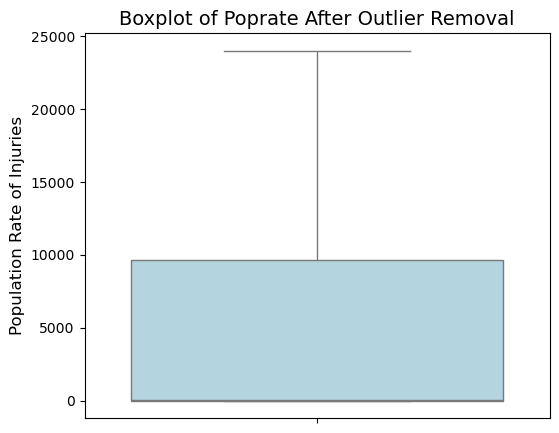

In [75]:
# Remove outliers from 'poprate'
df_outliers_removed = remove_outliers(df, 'poprate')

# Plot boxplot
plt.figure(figsize=(6, 5))
sns.boxplot(y=df_outliers_removed['poprate'], color='lightblue')

# Labels and title
plt.ylabel("Population Rate of Injuries", fontsize=12)
plt.title("Boxplot of Poprate After Outlier Removal", fontsize=14)

# Show the plot
plt.show()


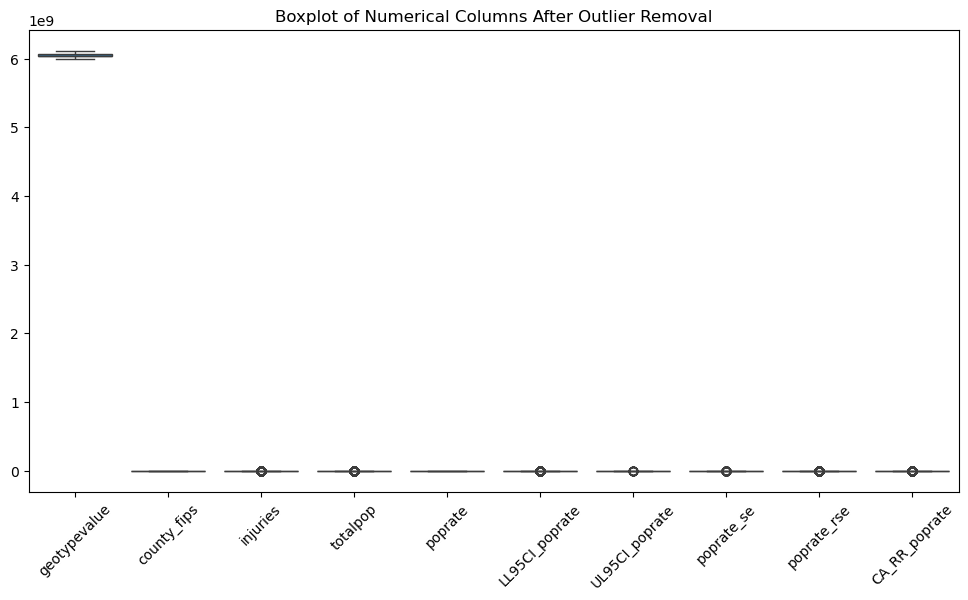

In [79]:
# To create a boxplot of all columns after outlier removal,
# Identify numerical columns
numeric_cols = df.select_dtypes(include=['number'])

# Outlier removal using IQR
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Ensure 'numeric_cols' is defined before filtering
df_cleaned = numeric_cols[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

# Plot boxplots after outlier removal
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned)
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Columns After Outlier Removal")
plt.show()

In [87]:
# Check skewness in numerical features
numerical_cols = df_cleaned.select_dtypes(include=[np.number]).columns
skewed_features = df_cleaned[numerical_cols].apply(lambda x: x.skew()).sort_values(ascending=False)
print("\nSkewness in Features:")
print(skewed_features)


Skewness in Features:
injuries          1.118388
county_fips       0.347337
geotypevalue      0.346922
LL95CI_poprate    0.328207
totalpop          0.247462
poprate_se        0.231833
poprate           0.201882
poprate_rse       0.081418
UL95CI_poprate   -0.092724
CA_RR_poprate    -0.502359
dtype: float64


In [91]:
# Apply log transformation to reduce skewness
for feature in skewed_features.index:
    if abs(skewed_features[feature]) > 1:  # Apply only to highly skewed features
        df_cleaned.loc[:, feature] = np.log1p(df_cleaned[feature])

In [115]:
print("\nBefore Transformation:\n", df_cleaned[feature].describe())
df_cleaned[feature] = np.log1p(df_cleaned[feature])
print("\nAfter Transformation:\n", df_cleaned[feature].describe())



Before Transformation:
 count    207542.000000
mean          1.076092
std           0.329525
min           0.076961
25%           0.797507
50%           1.290869
75%           1.290869
max           1.819699
Name: CA_RR_poprate, dtype: float64

After Transformation:
 count    207542.000000
mean          0.716115
std           0.175392
min           0.074143
25%           0.586401
50%           0.828931
75%           0.828931
max           1.036630
Name: CA_RR_poprate, dtype: float64


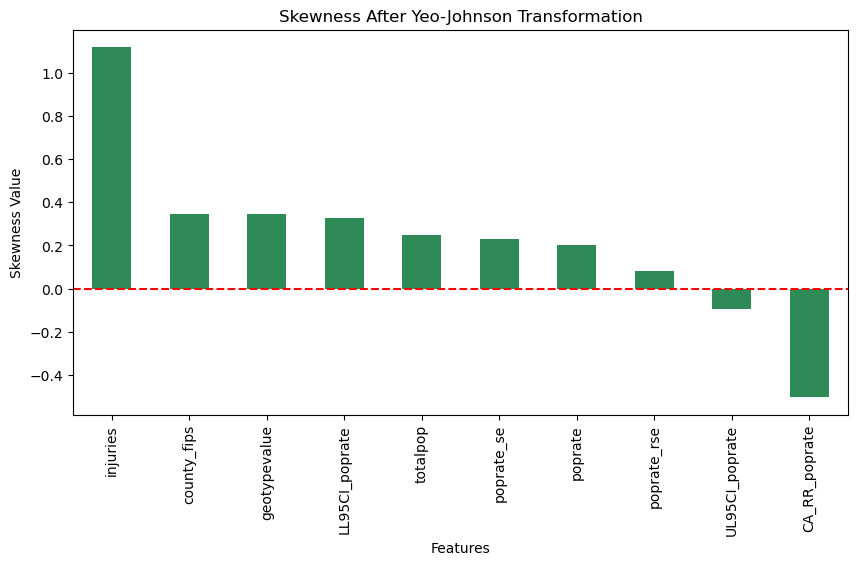

In [124]:
 #Visualizing Skewness After Transformation
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
skewed_features.plot(kind='bar', color='seagreen')
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at 0 (no skew)
plt.title("Skewness After Yeo-Johnson Transformation")
plt.xlabel("Features")
plt.ylabel("Skewness Value")
plt.show()

In [132]:
# Define target variable (dependent variable)
target = 'poprate'  # Change this if needed

# Separate features (X) and target (y)
X = df_cleaned.drop(columns=[target])  # Independent variables
y = df_cleaned[target]  # Dependent variable

# Display shapes
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

# Display first few rows of features and target
print("First few rows of features (X):")
print(X.head())

print("\nFirst few values of target (y):")
print(y.head())


Features (X) shape: (207542, 9)
Target (y) shape: (207542,)
First few rows of features (X):
      geotypevalue  county_fips  injuries  totalpop  LL95CI_poprate  \
4897  6.063000e+09       6063.0  0.741276   68356.0        9.200426   
4898  6.069000e+09       6069.0  0.869742   68356.0        9.200426   
4899  6.077000e+09       6077.0  0.526589   68356.0        9.200426   
4901  6.107000e+09       6107.0  0.526589   68356.0        9.200426   
4903  6.073000e+09       6073.0  0.526589   68356.0        9.200426   

      UL95CI_poprate  poprate_se  poprate_rse  CA_RR_poprate  
4897       38.037243     9.32058    58.465875       0.828931  
4898       38.037243     9.32058    58.465875       0.828931  
4899       38.037243     9.32058    58.465875       0.828931  
4901       38.037243     9.32058    58.465875       0.828931  
4903       38.037243     9.32058    58.465875       0.828931  

First few values of target (y):
4897    34.37
4898     0.12
4899     2.92
4901    19.43
4903     7.29


In [136]:
#Using Correlation Analysis (Pearson's Correlation)import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df_cleaned.corr()

# Sort correlation values with target variable
correlation_target = correlation_matrix['poprate'].sort_values(ascending=False)

# Display top correlated features
print("Feature Correlation with Target (poprate):")
print(correlation_target)

Feature Correlation with Target (poprate):
poprate           1.000000
poprate_se        0.752298
UL95CI_poprate    0.744156
CA_RR_poprate     0.581890
LL95CI_poprate    0.512009
totalpop          0.379357
poprate_rse       0.315040
injuries         -0.002615
geotypevalue     -0.486424
county_fips      -0.489236
Name: poprate, dtype: float64


Skewness of Numerical Features:
geotypevalue      0.346922
county_fips       0.347337
injuries          0.044682
totalpop          0.247462
poprate           0.201882
LL95CI_poprate    0.328207
UL95CI_poprate   -0.092724
poprate_se        0.231833
poprate_rse       0.081418
CA_RR_poprate    -1.134796
dtype: float64


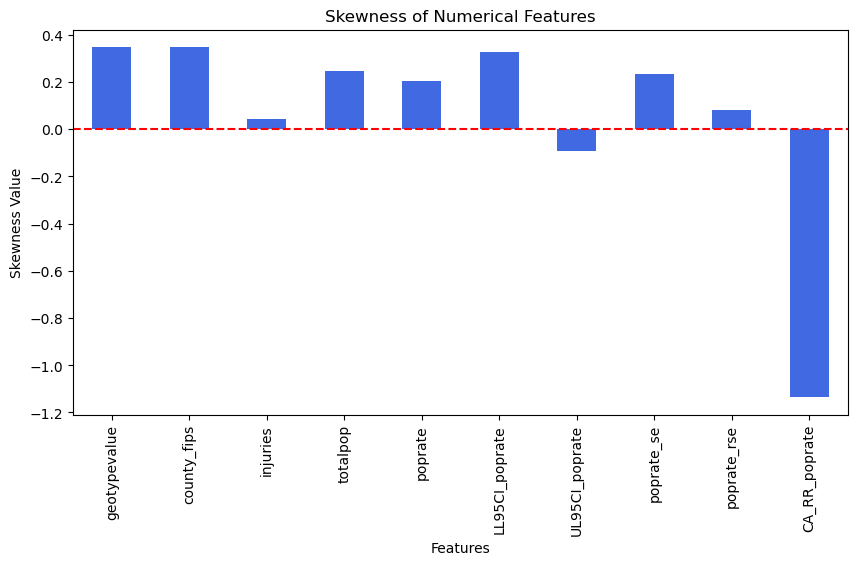

In [140]:
# Calculate skewness for all numerical features
skewness_values = df_cleaned.skew()

# Display skewness values
print("Skewness of Numerical Features:")
print(skewness_values)

# Visualizing skewness using a bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
skewness_values.plot(kind='bar', color='royalblue')
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at 0 (no skew)
plt.title("Skewness of Numerical Features")
plt.xlabel("Features")
plt.ylabel("Skewness Value")
plt.show()


# Exploratory Data Analysis

In [95]:
 # Summary statistics for numerical columns
df.describe()

,geotypevalue,county_fips,injuries,totalpop,poprate,LL95CI_poprate,UL95CI_poprate,poprate_se,poprate_rse,CA_RR_poprate
count,4.489500e+05,448950.000000,448950.000000,4.489500e+05,4.489500e+05,448950.000000,448950.000000,448950.000000,448950.000000,448950.000000
mean,4.816763e+09,6055.795018,6.797570,6.080408e+05,9.620222e+03,9.200426,38.037243,9.320580,58.465875,2.635943
std,3.169903e+09,27.166384,122.698706,8.113827e+05,1.093049e+05,25.028142,335.179314,115.288793,49.407926,18.282693
min,1.000000e+00,6001.000000,0.200000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.010000,0.010000,0.030000
25%,6.011000e+09,6037.000000,0.670000,6.131600e+04,3.190000e+00,0.000000,5.380000,0.940000,21.320000,0.940000
50%,6.037573e+09,6059.000000,1.000000,4.807920e+05,1.599000e+01,5.590000,27.720000,4.590000,58.465875,2.360000
75%,6.071009e+09,6073.000000,2.000000,6.080408e+05,9.620222e+03,9.200426,38.037243,9.320580,58.465875,2.635943
max,1.000000e+11,6115.000000,13578.000000,1.805153e+07,3.048563e+06,4368.360000,84784.350000,29992.020000,254.030000,5182.950000


In [97]:
 # Summary for categorical columns
df.describe(include=['object'])

,ind_id,ind_definition,reportyear,geotype,geoname,county_name,mode,severity,version
count,448950,448950,448950,448950,448950,448950,448950,448950,448950
unique,3,1,13,6,13467,58,9,3,1
top,753,Annual number of fatal and severe road traffic...,2006-2010,CT,2,Los Angeles,All modes,Severe Injury,17/12/2013 13:55
freq,393216,448950,59396,354078,921,112467,126487,302487,448950


<Figure size 1200x600 with 0 Axes>

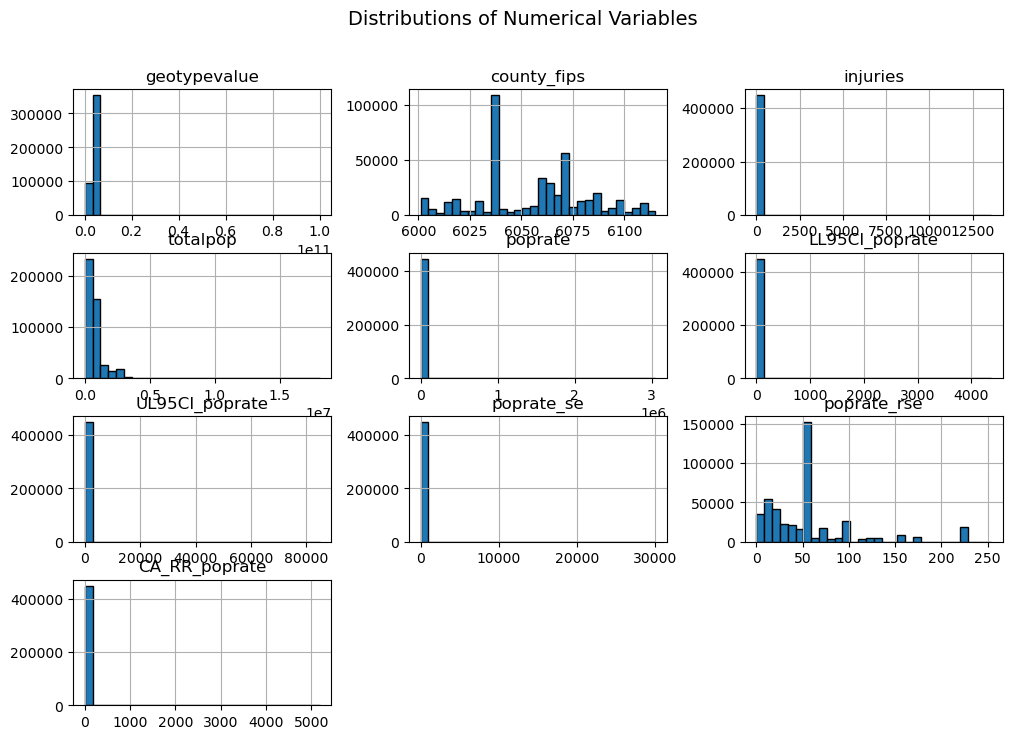

In [99]:
#Distributions of Numerical Variables
plt.figure(figsize=(12, 6))
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Distributions of Numerical Variables", fontsize=14)
plt.show()

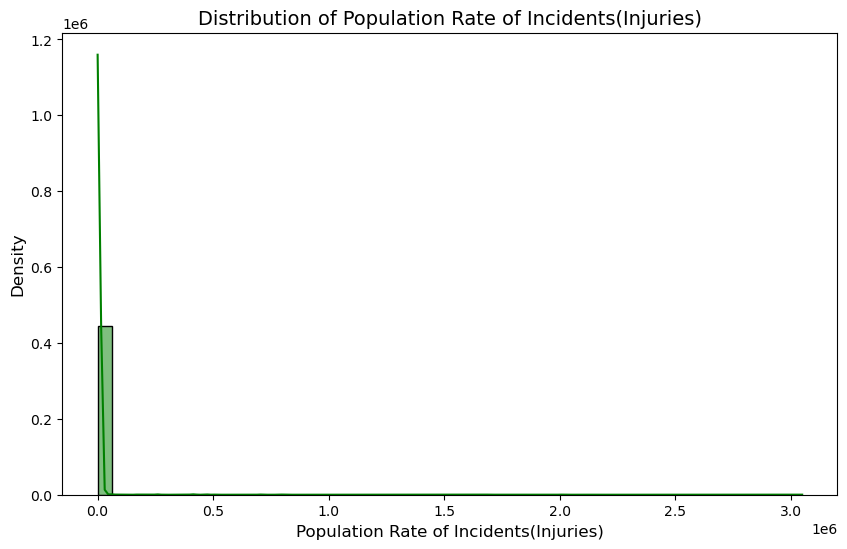

In [156]:
# Distribution of Target Variable


# Set figure size
plt.figure(figsize=(10, 6))

# Plot the distribution of the target variable
sns.histplot(df['poprate'].dropna(), bins=50, kde=True, color='green')

# Add labels and title
plt.xlabel("Population Rate of Incidents(Injuries)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Distribution of Population Rate of Incidents(Injuries)", fontsize=14)

# Show the plot
plt.show()

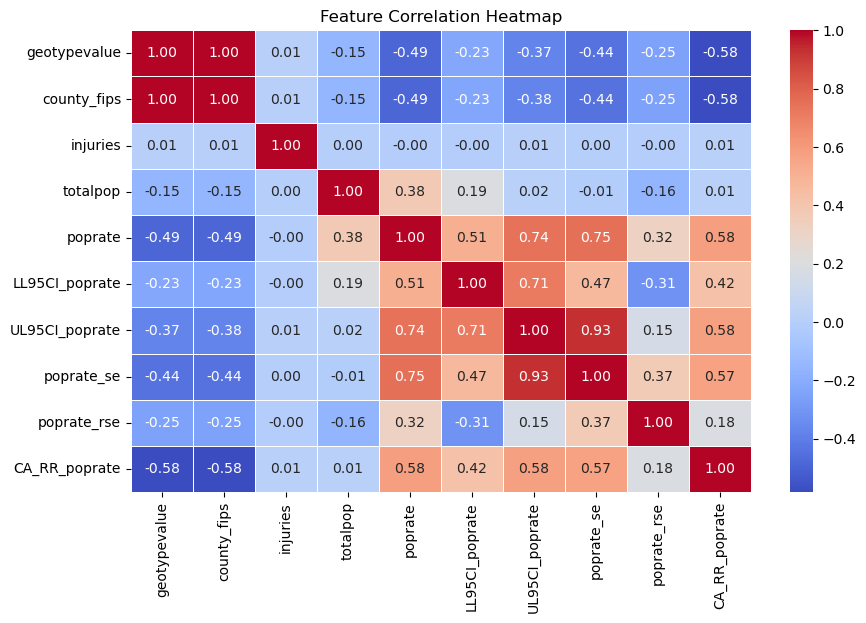

In [144]:
# Visualizing correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Feature Engineering

In [150]:
#scaling
from sklearn.preprocessing import StandardScaler

# Selecting only numerical columns to scale from df (replace df with your dataset name)
df_numeric = df.select_dtypes(include=['number'])  

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling
x_scaled = scaler.fit_transform(df_numeric)

# Convert back to DataFrame
df_scaled = pd.DataFrame(x_scaled, columns=df_numeric.columns)

print("Standard Scaled Data (First 5 Rows):")
print(df_scaled.head())

Standard Scaled Data (First 5 Rows):
   geotypevalue  county_fips  injuries  totalpop   poprate  LL95CI_poprate  \
0      -1.51953     0.117976  1.517560  2.842832 -0.087952       -0.140259   
1      -1.51953     0.117976  5.820789  2.842832 -0.087786        0.548566   
2      -1.51953     0.117976  0.001650  2.842832 -0.088011       -0.365206   
3      -1.51953     0.117976  0.343952  2.842832 -0.087997       -0.319258   
4      -1.51953     0.117976 -0.047251  2.842832 -0.088013       -0.367604   

   UL95CI_poprate  poprate_se  poprate_rse  CA_RR_poprate  
0       -0.090928   -0.076682    -1.037605      -0.113000  
1       -0.034302   -0.072866    -1.108040      -0.109171  
2       -0.112230   -0.080065    -0.418271      -0.092215  
3       -0.107069   -0.078764    -0.894106      -0.088387  
4       -0.113185   -0.080585     0.840638      -0.114641  


In [152]:
# Splitting the dataset into training (80%) and testing (20%) sets
from sklearn.model_selection import train_test_split

# Assuming df is your dataset and 'target_variable' is the dependent variable
X = df.drop(columns=['poprate'])  # Independent features
y = df['poprate']  # Target variable

# Splitting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of the resulting sets
print(f"Training set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Testing set: X_test = {X_test.shape}, y_test = {y_test.shape}")

Training set: X_train = (359160, 18), y_train = (359160,)
Testing set: X_test = (89790, 18), y_test = (89790,)
